In [125]:
import pandas as pd 
import numpy as np 
import pprint as pp

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# Algunas configuraciones de los paquetes
sns.set(color_codes=True)

In [127]:
#Ofertas de trabajo en remoto
ofertas=pd.read_csv(r"C:\Users\reito\Documents\GitHub\77_Miss_Cosas\2.Analytics\EDA\remote_jobs_in Spain(2020)\jobs.csv")
ofertas.iloc[0:12,:]

,title,city,province,price_start,price_end,price_interval,price_currency,description,date,expertise,type,functions,sectors,portal
0,support,Sant Cugat del Vallès,Barcelona,NaN,NaN,NaN,euro,date posted sep 4 2020 location sant cugat ...,2020-10-23,NaN,NaN,NaN,NaN,indeed
1,qa tester,Sant Cugat del Vallès,Barcelona,NaN,NaN,NaN,euro,date posted oct 22 2020 location sant cugat...,2020-10-23,NaN,NaN,NaN,NaN,indeed
2,mathematics consultant,Sant Cugat del Vallès,Barcelona,NaN,NaN,NaN,euro,date posted oct 22 2020 location sant cugat...,2020-10-23,NaN,NaN,NaN,NaN,indeed
3,€1500 mes ventas internet,Tarragona,Tarragona,1500.0,NaN,monthly,euro,buscamos personas trabajar ventas dedicando 3...,2020-10-23,NaN,NaN,NaN,NaN,indeed
4,jovenes €1500 ventas internet,Tarragona,Tarragona,1500.0,NaN,monthly,euro,buscamos personas trabajar ventas dedicando 3...,2020-10-23,NaN,NaN,NaN,NaN,indeed
5,€1500 mes ventas experiencia,Tarragona,Tarragona,NaN,NaN,NaN,euro,buscamos personas trabajar ventas dedicando 3...,2020-10-23,NaN,NaN,NaN,NaN,indeed
6,jovenes €1500 mes trabajando ventas internet,Tarragona,Tarragona,1500.0,NaN,monthly,euro,buscamos jóvenes trabajar ventas modelo tele t...,2020-10-23,NaN,NaN,NaN,NaN,indeed
7,€1500 mes trabajando ventas internet toda edad,Tarragona,Tarragona,1500.0,NaN,monthly,euro,buscamos personas trabajar ventas dedicando 3...,2020-10-23,NaN,NaN,NaN,NaN,indeed
8,atencion jovenes €1500 teletrabajo ventas int...,Tarragona,Tarragona,1500.0,NaN,monthly,euro,buscamos personas trabajar ventas modelo telet...,2020-10-23,NaN,NaN,NaN,NaN,indeed
9,¿quieres teletrabajar casa experiencia formac...,Toledo,Toledo,NaN,NaN,NaN,euro,si emprended r ganas trabajar aprender oport...,2020-10-23,NaN,NaN,NaN,NaN,indeed


In [128]:
#Ranking de las localizaciones desde las que se lanzan más ofertas de empleo
#Este dato es importante para:
#     **1 Estar más pendientes de las ofertas que se lanzen allí porque es donde voy a encontrar más ofertas en remoto
#     **2 Ser conocedores de donde se encuentran las Centrale de las oficinas en caso de que haga falta desplazarse ahí de manera periódica
#NOTA 1--> Hay 2 localizaciones que a priori son neutras y no requieren de estas consideraciones de desplazamiento y son 'España' y 'En remoto'
#NOTA 2 -->Obtén gráfica de los resultados obtenidos 
prov_deman=ofertas.copy()
loc_headq=prov_deman.province.value_counts().head(9)
print(loc_headq)

province
Madrid       816
Barcelona    458
España       140
En remoto    118
Málaga        47
Sevilla       32
Valencia      28
Zaragoza      21
Granada       20
Name: count, dtype: int64


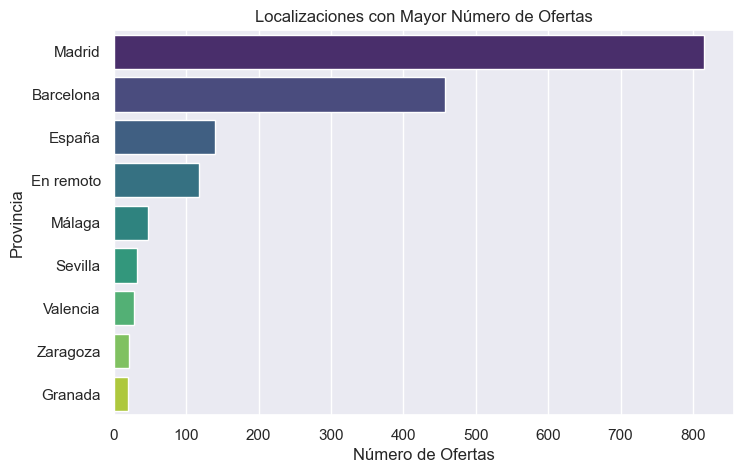

In [129]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 5))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x=loc_headq.values, y=loc_headq.index, palette="viridis",hue=loc_headq.index)
plt.xlabel("Número de Ofertas")
plt.ylabel("Provincia")
plt.title("Localizaciones con Mayor Número de Ofertas")
plt.show()


In [130]:
#ofertas[['province','city']].unique() # -->Estos son los unicos valores 
#ofertas.loc[::,'city':'province']
#Esta información no aporta nada

In [131]:
print('======================'*5)
print("La FORMA que tiene el DATASET es de:",ofertas.shape) #Forma del dataset
print("El numero de FILAS que tienes es", ofertas.shape[0])  # o con print("El numero de filas que tienes es", ofertas.city.size)
print("El numero de COLUMNAS que tienes es", ofertas.shape[1]) #tot_pobl_fil=len(ofertas) tambien cuenta las filas del df
print("Los indices de COLUMNAS del DATASET son:",ofertas.index)  #Así se muestran los valores de indices de fila,  si no fuesen numericos te muestra el array
print('======================'*5)

print("\nEl NOMBRE DE LAS COLUMNAS son lo siguientes:\n\n",ofertas.columns) #Así se muestran los valores de indices de columna

La FORMA que tiene el DATASET es de: (1987, 14)
El numero de FILAS que tienes es 1987
El numero de COLUMNAS que tienes es 14
Los indices de COLUMNAS del DATASET son: RangeIndex(start=0, stop=1987, step=1)

El NOMBRE DE LAS COLUMNAS son lo siguientes:

 Index(['title', 'city', 'province', 'price_start', 'price_end',
       'price_interval', 'price_currency', 'description', 'date', 'expertise',
       'type', 'functions', 'sectors', 'portal'],
      dtype='object')


In [132]:
ofertas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1987 non-null   object 
 1   city            907 non-null    object 
 2   province        1984 non-null   object 
 3   price_start     225 non-null    float64
 4   price_end       118 non-null    float64
 5   price_interval  225 non-null    object 
 6   price_currency  1987 non-null   object 
 7   description     1985 non-null   object 
 8   date            1987 non-null   object 
 9   expertise       949 non-null    object 
 10  type            949 non-null    object 
 11  functions       943 non-null    object 
 12  sectors         933 non-null    object 
 13  portal          1987 non-null   object 
dtypes: float64(2), object(12)
memory usage: 217.5+ KB


                %_Datos_Informados
title                        100.0
price_currency               100.0
date                         100.0
portal                       100.0
description                   99.9
province                      99.8
expertise                     47.8
type                          47.8
functions                     47.5
sectors                       47.0
city                          45.6
price_start                   11.3
price_interval                11.3
price_end                      5.9 




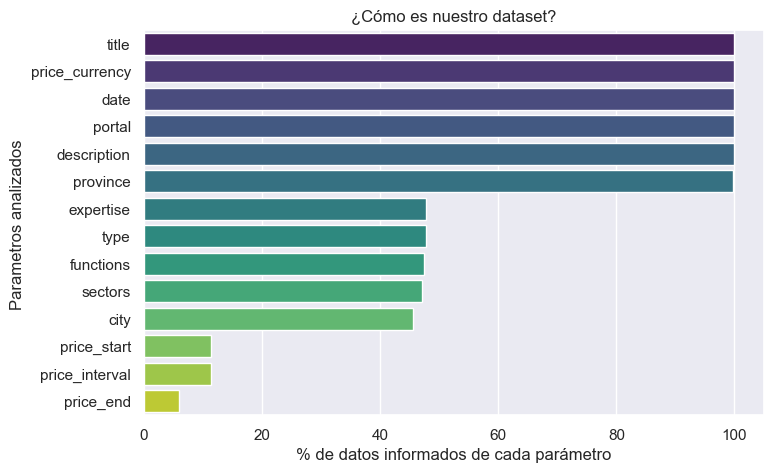

In [133]:
# Que % de DATOS informados en estas columnas CONTIENEN INFORMACION (SON DISTINTOS de 0, vacío o NaN)?
# [Esto lo hago para saber si voy a tener suficientes datos como para sacar conclusiones interesantes]

list=[]
for i in ofertas.columns:
    list.append(round((1-np.sum(ofertas[i].isnull())/len(ofertas))*100,1))

#pp.pprint(list) Esta es la cantidad de datos con informacion en esta columna
    
col_masutiles=pd.DataFrame(data=list,index=ofertas.columns) #df columna desordenado y nombre col automático
col_masutiles=col_masutiles.rename(columns={0:'%_Datos_Informados'})   #Renombramos columna 
col_masutiles=col_masutiles.sort_values(by='%_Datos_Informados',axis=0,ascending=False )  #Ordenamos columna 
print(col_masutiles,'\n\n')

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 5))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x=col_masutiles['%_Datos_Informados'], y=col_masutiles.index, palette="viridis",hue=col_masutiles.index)

plt.xlabel("% de datos informados de cada parámetro")
plt.ylabel("Parametros analizados ")
plt.title("¿Cómo es nuestro dataset?")
plt.show()




| Cabecero        | Descripción                                         |
|-----------------|-----------------------------------------------------|
| title           | Título o nombre del puesto de trabajo anunciado     |
| city            | Ciudad donde se encuentra la ubicación del trabajo  |
| province        | Provincia o región geográfica de la ubicación          |
| price_start     | Salario mínimo anunciado (en euros)                    |
| price_end       | Salario máximo anunciado (en euros)                    |
| price_interval  | Frecuencia de pago (diario/semanal/mensual)            |
| price_currency  | Moneda en la que se expresa el salario                 |
| description     | Descripción detallada del trabajo y requisitos         |
| date            | Fecha de publicación del anuncio de trabajo            |
| expertise       | Nivel de experiencia requerido(txt libre no preciso)   |
| type            | Tipo de trabajo (txt libre no preciso)                 |
| functions       | Funciones o responsabilidades (txt libre no preciso)   |
| sectors         | Sectores o industrias relacionados(txt libre no preciso)|
| portal          | Portal o plataforma donde se publicó el anuncio    |



####  Estas son las COLUMNAS QUE CONSIDERO MÁS ÚTILES, apuesto por las columnas que tienen más de un 80% de resultados confiando en el principio de Pareto (80-20).

Si tienes el 80% de un conjunto de datos informado, según el principio de Pareto o la regla del 80/20, podrías concluir lo siguiente:

1. **Concentración de Información:** El 80% de la información o resultados proviene de una parte relativamente pequeña del conjunto de datos. Esto significa que una minoría de los datos o factores tiene un impacto significativo en los resultados o en tu comprensión de la situación.

2. **Importancia de la Identificación:** Identificar y comprender bien esta parte clave del conjunto de datos es esencial, ya que probablemente contenga la mayoría de la información crítica o los patrones relevantes.

3. **Posible Simplificación:** Puedes simplificar tu análisis o enfoque al centrarte principalmente en esta parte importante del conjunto de datos. Esto puede ayudarte a tomar decisiones más efectivas y ahorra tiempo y recursos al evitar un análisis exhaustivo de todos los datos.

4. **Enfoque en la Mejora:** Si estás trabajando en la mejora de un proceso o la toma de decisiones, enfócate en los factores o variables que forman parte de ese 80% inicial. Mejorar o optimizar estos factores puede tener un impacto significativo en los resultados globales.

In [134]:
##Estas son las COLUMNAS QUE CONSIDERO MÁS UTILES, apuesto por las columnas que tienen más de un 80% de reultados 
##confiando en el principio de Pareto (80-20).

'''
1.Concentración de Información: El 80% de la información o resultados proviene de una parte 
relativamente pequeña del conjunto de datos.
Esto significa que una minoría de los datos o factores tiene un impacto significativo en 
los resultados o en tu comprensión de la situación.

2.Importancia de la Identificación: Identificar y comprender bien esta parte clave del conjunto de datos es esencial, 
ya que probablemente contenga la mayoría de la información crítica o los patrones relevantes.

3.Posible Simplificación: Puedes simplificar tu análisis o enfoque al centrarte principalmente en esta parte importante
del conjunto de datos. Esto puede ayudarte a tomar decisiones más efectivas y ahorra tiempo y recursos al evitar un 
análisis exhaustivo de todos los datos.

4.Enfoque en la Mejora: Si estás trabajando en la mejora de un proceso o la toma de decisiones, enfócate en los factores
o variables que forman parte de ese 80% inicial. Mejorar o optimizar estos factores puede tener un impacto significativo 
en los resultados globales.
'''


'\n1.Concentración de Información: El 80% de la información o resultados proviene de una parte \nrelativamente pequeña del conjunto de datos.\nEsto significa que una minoría de los datos o factores tiene un impacto significativo en \nlos resultados o en tu comprensión de la situación.\n\n2.Importancia de la Identificación: Identificar y comprender bien esta parte clave del conjunto de datos es esencial, \nya que probablemente contenga la mayoría de la información crítica o los patrones relevantes.\n\n3.Posible Simplificación: Puedes simplificar tu análisis o enfoque al centrarte principalmente en esta parte importante\ndel conjunto de datos. Esto puede ayudarte a tomar decisiones más efectivas y ahorra tiempo y recursos al evitar un \nanálisis exhaustivo de todos los datos.\n\n4.Enfoque en la Mejora: Si estás trabajando en la mejora de un proceso o la toma de decisiones, enfócate en los factores\no variables que forman parte de ese 80% inicial. Mejorar o optimizar estos factores puede 

In [138]:
#ÉSTAS SON LAS COLUMNAS MÁS ÚTILES
# De estas columnas selecciono como fundamentales:
#   'Title'-->Porque nos dice el tipo de trabajo que se oferta
#   'Date'--> Porque nos dice el espacio de tiempo en el que se hizo el extracto de fechas 
#   'Province-->Para hacernos a la idea de la localización de las empresas más abiertas al trabajo en remoto

# Nota --> Deshecho 'description' porque cada uno de los anunciante clasifica los puestos sin un criterio estandar 
# Y por lo tanto no nos podemos fiar de lo que dicen. Con 'Title' pasa algo parecido pero creo que es conveniente dejar algun identificativo

#Como informacion sesgada y para orientarnos un poco con los datos que tenemos sobre los sueldos min-max-medio (mensual/anual) 
#extraeremos los datos de la columna 'price_star', 'prince_end' y  'price interval'-->Salario de los nómadas digitales 


round(col_masutiles[col_masutiles['%_Datos_Informados']>0.8],2)

,%_Datos_Informados
title,100.0
price_currency,100.0
date,100.0
portal,100.0
description,99.9
province,99.8
expertise,47.8
type,47.8
functions,47.5
sectors,47.0


**<style>
p {
    line-height: 1; /* Esto establece el interlineado al mínimo (sin espacio entre líneas) */
}
</style>**
*<p>Para orientarnos un poco a nivel de retribuciones salariales ofertadas, ya que sólo un 10% de los datos estan documentados en este aspecto,extraeremos los datos de la columna  **<p>'price_star' , 'prince_end'  y 'price interval'<p>**-->Salario de los nómadas digitales DE ESTA MANERA CALCULAMOS LOS SALARIOS QUE HAY PARA TRABAJOS EN REMOTO</p>*

In [139]:
inter_base=ofertas[['price_start','price_end','price_interval']] 
inter_sal=inter_base.copy()

In [140]:
#La columna 'price start' de la tabla "inter_sal" muestra la retribucion salarial del puesto de trabajo por año/mes/semana/hora
#-->ESTIMACION CON LOS SALARIOS MÁS BAJOS (MENOS OPTIMISTA--> Ej. salario inicial anual)
sal_ini_anu=inter_sal['price_start'][inter_sal['price_interval']=='yearly']
sal_ini_men=inter_sal['price_start'][inter_sal['price_interval']=='monthly']
sal_ini_sem=inter_sal['price_start'][inter_sal['price_interval']=='weekly']
sal_ini_hora=inter_sal['price_start'][inter_sal['price_interval']=='hourly']

In [141]:
#La columna 'price end' de la tabla "inter_sal" muestra la retribucion salarial del puesto de trabajo por año/mes/semana/hora
#-->ESTIMACION CON LOS SALARIOS MÁS ALTOS ESPERADOS (OPTIMISTA-->Ej. salario inicial anual optimista)
#La tabla tarifica los salarios en base a precio por año/mes/semana/hora-->ESTIMACION CON LOS SALARIOS MÁS ALTOS(OPTIMISTA)
sal_ini_anu_op=inter_sal['price_end'][inter_sal['price_interval']=='yearly']
sal_ini_men_op=inter_sal['price_end'][inter_sal['price_interval']=='monthly']
sal_ini_sem_op=inter_sal['price_end'][inter_sal['price_interval']=='weekly']
sal_ini_hora_op=inter_sal['price_end'][inter_sal['price_interval']=='hourly']

#NOTA(1): 
#Todos estos valores: 'sal_ini_anu_op','sal_ini_men_op','sal_ini_sem_op','sal_ini_hora_op' nos dan números pero cada uno de distinta magnitud
#lo cual no nos permite hacer un analisis descriptivo de la muestra
#NO es lo mismo la escala de retribucion anual con cifras mayores a 10k€,que la mensual, con cifras en torno a los 1000-2000€, o las diarias.
#Por lo que tendremos que unificar de alguna manera los datos obtenidos
#NOTA(2):
#Idem para los daros menos optimistas 

#### Lo que se hace a continuación es extrapolar todos los datos a nivel salario bruto anual SUPONIENDO:
#### Jornadas laborales de 8 horas y 225 díasde trabajo al año tal y conforme se tenían en 2020 (pendiente de revisión por el gobierno en 2024).

***info***: Factorial

https://factorialhr.es/blog/calcular-jornada-laboral/#:~:text=Otro%20elemento%20a%20tener%20en,quedamos%20con%20243%20días%20laborales.

***info***: elEconomista

https://www.eleconomista.es/empleo/noticias/12506361/10/23/cuantas-horas-anuales-son-375-horas-semanales.html

***info***: statista

https://es.statista.com/estadisticas/478441/promedio-de-horas-de-trabajo-al-ano-segun-convenios-colectivos-de-espana/


In [142]:
#Correccion anual-->VISION DE SALARIOS MENOS OPTIMISTA 
sal_ini_anu=      inter_sal['price_start'][inter_sal['price_interval']=='yearly']
sal_ini_men_corr=  (inter_sal['price_start'][inter_sal['price_interval']=='monthly'])*12   #Correccion de mensual a anual
sal_ini_sem_corr=  (inter_sal['price_start'][inter_sal['price_interval']=='weekly'])*52    #Correccion de semanal a anual
sal_ini_hora_corr= (inter_sal['price_start'][inter_sal['price_interval']=='hourly'])*1736  #Correccion de horaria a anual
sal_tot=pd.concat([sal_ini_anu,sal_ini_men_corr,sal_ini_sem_corr,sal_ini_hora_corr])       #Unión de todos los segmentos de tabla corregidos
round(sal_tot.describe(),2)



count       225.00
mean      25482.76
std       21613.69
min        3000.00
25%       12000.00
50%       18000.00
75%       30000.00
max      121500.00
Name: price_start, dtype: float64

In [143]:
#Correccion anual-->VISION DE SALARIOS OPTIMISTA 
sal_ini_anu_op=      inter_sal['price_end'][inter_sal['price_interval']=='yearly']
sal_ini_men_corr_op=  (inter_sal['price_end'][inter_sal['price_interval']=='monthly'])*12   #Correccion de mensual a anual
sal_ini_sem_corr_op=  (inter_sal['price_end'][inter_sal['price_interval']=='weekly'])*52    #Correccion de semanal a anual
sal_ini_hora_corr_op= (inter_sal['price_end'][inter_sal['price_interval']=='hourly'])*1736  #Correccion de horaria a anual
sal_tot_op=pd.concat([sal_ini_anu_op,sal_ini_men_corr_op,sal_ini_sem_corr_op,sal_ini_hora_corr_op]) #Union de todos los segmentos de tabla corregidos
round(sal_tot_op.describe(),2)


count       118.00
mean      38692.85
std       20254.56
min        5000.00
25%       24000.00
50%       37500.00
75%       50000.00
max      104160.00
Name: price_end, dtype: float64

In [147]:
print("CON PERSPECTIVAS LABORALES OPTIMISTAS(BRUTO ANUAL)=============================================================== ")
print("El salario inicial que se suele pagar habitualmente es de",sal_tot_op.describe()['50%'],"€ Anuales")
print("Los salarios más bajos acostumbran a estar en torno a los",sal_tot_op.describe()['25%'],"€ Anuales")
print("Los salarios más altos acostumbran a estar en torno a los",sal_tot_op.describe()['75%'],"€ Anuales")
print("De manera excepcional encontramos salarios donde inicialmente se ganan",sal_tot_op.describe()['max'],"€ Anuales")
print("================================================================================================================= ")

CON PERSPECTIVAS LABORALES OPTIMISTAS(BRUTO ANUAL)=============================================================== 
El salario inicial que se suele pagar habitualmente es de 37500.0 € Anuales
Los salarios más bajos acostumbran a estar en torno a los 24000.0 € Anuales
Los salarios más altos acostumbran a estar en torno a los 50000.0 € Anuales
De manera excepcional encontramos salarios donde inicialmente se ganan 104160.0 € Anuales


In [146]:
print("CON PERSPECTIVAS LABORALES POCO OPTIMISTAS(BRUTO ANUAL)========================================================== ")
print("El salario inicial que se suele pagar habitualmente es de",sal_tot.describe()['50%'],"€ Anuales")
print("Los salarios más bajos acostumbran a estar en torno a los",sal_tot.describe()['25%'],"€ Anuales")
print("Los salarios más altos acostumbran a estar en torno a los",sal_tot.describe()['75%'],"€ Anuales")
print("De manera excepcional encontramos salarios donde inicialmente se ganan",sal_tot.describe()['max'],"€ Anuales")
print("================================================================================================================= ")

CON PERSPECTIVAS LABORALES POCO OPTIMISTAS(BRUTO ANUAL)========================================================== 
El salario inicial que se suele pagar habitualmente es de 18000.0 € Anuales
Los salarios más bajos acostumbran a estar en torno a los 12000.0 € Anuales
Los salarios más altos acostumbran a estar en torno a los 30000.0 € Anuales
De manera excepcional encontramos salarios donde inicialmente se ganan 121500.0 € Anuales



#####  Lo siguiente es conocer la RETRIBUCION NETA MENSUAL a la que se aspira con un trabajo en remoto SI QUIERO SER UN NÓMADA DIGITAL que efectua su trabajo en el AMBITO GEOGRAFICO de ESPAÑA

A continuación, se detallan los tramos del IRPF para 2020:

Con ingresos hasta 12.450 €, la retención será del 19 %
Desde 12.450 € hasta 20.200 €, se retendrá el 24 %
Entre 20.200 € y 35.200 €, será el 30 %
De 35.200 € a 60.000 €, el 37 %
Sobre los 60.000 €, la retención será del 45 %

Fuente: Instituto de  Estudios Cajasol
https://institutocajasol.com/tramos-irpf-espana/


In [ ]:
irpf=[0.81, 0.76, 0.7, 0.63, 0.55]
print("SALARIO NETO MENSUAL CON UNA PERSPECTIVA POCO OPTIMISTA (14 PAGAS) =============================================== ")
print("\t-El salario inicial que se suele pagar habitualmente es de",round((sal_tot.describe()['50%']*irpf[1])/14,2),"€ al mes")
print("\t-Los salarios más bajos acostumbran a estar en torno a los",round((sal_tot.describe()['25%']*irpf[0])/14,2),"€ al mes")
print("\t-Los salarios más altos acostumbran a estar en torno a los",round((sal_tot.describe()['75%']*irpf[2])/14,2),"€ al mes")
print("\t-De manera excepcional encontramos salarios donde inicialmente se ganan",round((sal_tot.describe()['max']*irpf[4])/14,2),"€ al mes")
print("================================================================================================================== ")

SALARIO NETO MENSUAL CON UNA PERSPECTIVA POCO OPTIMISTA (14 PAGAS) =============================================== 
	-El salario inicial que se suele pagar habitualmente es de 977.14 € al mes
	-Los salarios más bajos acostumbran a estar en torno a los 694.29 € al mes
	-Los salarios más altos acostumbran a estar en torno a los 1500.0 € al mes
	-De manera excepcional encontramos salarios donde inicialmente se ganan 4773.21 € al mes


In [ ]:
irpf=[0.81, 0.76, 0.7, 0.63, 0.55]
print("SALARIO NETO MENSUAL CON UNA PERSPECTIVA OPTIMISTA (14 PAGAS) ==================================================== ")
print("\t-El salario inicial que se suele pagar habitualmente es de",round((sal_tot_op.describe()['50%']*irpf[1])/14,2),"€ al mes")
print("\t-Los salarios más bajos acostumbran a estar en torno a los",round((sal_tot_op.describe()['25%']*irpf[0])/14,2),"€ al mes")
print("\t-Los salarios más altos acostumbran a estar en torno a los",round((sal_tot_op.describe()['75%']*irpf[2])/14,2),"€ al mes")
print("\t-De manera excepcional encontramos salarios donde inicialmente se ganan",round((sal_tot.describe()['max']*irpf[4])/14,2),"€ al mes")
print("================================================================================================================== ")

SALARIO NETO MENSUAL CON UNA PERSPECTIVA OPTIMISTA (14 PAGAS) ==================================================== 
	-El salario inicial que se suele pagar habitualmente es de 2035.71 € al mes
	-Los salarios más bajos acostumbran a estar en torno a los 1388.57 € al mes
	-Los salarios más altos acostumbran a estar en torno a los 2500.0 € al mes
	-De manera excepcional encontramos salarios donde inicialmente se ganan 4773.21 € al mes


#  A PARTIR DE AQUI EL RESTO DE INFORMACION DE ESTE NOTEBOOK ES A ELIMINAR 

In [ ]:
#AHORA LO QUE HAY QUE HACER ES CONTABILIZAR EL NUMERO DE OFERTAS DE TRABAJO EN REMOTO POR PROVINCIA
#HAY ANUNCIANTES QUE NO HAN PUESTO BIEN EL NOMBRE DE LA PROVINCIA Y QUE EN SU LUGAR PONEN EL NOMBRE DE UNA CIUDAD
#HAY QUE (1)CONTABILIZAR ESTOS CASOS,(2)CONTABILIZAR LOS CASOS RESTANTES Y HACER UN ANÁLISIS DESCRIPTIVO DE 
#LAS PROVINCIAS QUE MÁS OFERTAS DE TRABAJO EN REMOTO PROPONEN--> Esto nos puede ayudar para saber que destino nómada elijo,
#ya que en cierta manera cuando tenga que ir por cualquier motivo a la central, no quiero que me cueste acceder  a la misma
# o que me genere los menores problemas
# Cuando elija lugar no quiero que tenga un indice de delicuencia alto 

In [ ]:
poblaciones=pd.read_csv(r"C:\Users\reito\Documents\GitHub\77_Miss_Cosas\2.Analytics\EDA\remote_jobs_in Spain(2020)\poblaciones.csv",sep=";")
poblaciones

,Total Nacional,Municipios,Sexo,Unidades de medida,Total
0,Total Nacional,NaN,Ambos sexos,Personas,47.400.798
1,Total Nacional,NaN,Hombres,Personas,23.248.611
2,Total Nacional,NaN,Mujeres,Personas,24.152.187
3,Total Nacional,01051 Agurain/Salvatierra,Ambos sexos,Personas,5.022
4,Total Nacional,01051 Agurain/Salvatierra,Hombres,Personas,2.525
...,...,...,...,...,...
24391,Total Nacional,51001 Ceuta,Hombres,Personas,42.536
24392,Total Nacional,51001 Ceuta,Mujeres,Personas,41.535
24393,Total Nacional,52001 Melilla,Ambos sexos,Personas,86.450
24394,Total Nacional,52001 Melilla,Hombres,Personas,43.823


In [ ]:
municipios=poblaciones.Municipios.apply(lambda x : str(x))
base=municipios.copy()
df_muni=base.apply(lambda x: x.split(' ')[1] if (len(x.split())>=2) else '')
poblaciones['Municipios']=df_muni
poblaciones.drop(columns=['Municipios'],inplace=False) #Ojo!!si vuelves a cargar la celda de volverá a ejecutar las acciones de split y selecc
pobla=poblaciones.copy() #Hago una copia de poblaciones para no tener que ir ejecutando esta celda nunca más 

In [ ]:
#Pero en este listado de municipios no aparece Municipio--Provincia  por lo que no podemos apoyar
#en esta tabla para hacer un match de municipios y obtenter las Provincias

In [ ]:
newp=pd.read_csv(r"C:\Users\reito\Documents\GitHub\77_Miss_Cosas\2.Analytics\EDA\remote_jobs_in Spain(2020)\pobla.csv",sep=';',index_col='CODAUTO')
#Quiero hacer una limpieza de nombres que aparecen en la columna 'Provincia' de la tabla 'ofertas'.
#Esta limpieza consiste en eliminar los fallos de los anunciantes que han puesto nombres de poblaciones donde tocaba poner nombres de 
#provincia. Como no tengo una tabla con nombres de Provincia y poblacion para hacer el filtrado , lo que hago es eliminar todos 
#aquellos nombre de provincia que no cooincidan con los del nombre de una provincia de real

In [ ]:
#Lo que viene a continuacion es innecesario pero me lo guardo por si tengo que aplicar algo similar más adelante

In [ ]:
newp.drop(columns=['CPRO'],inplace=True) #Aquí elimino la columna CPRO 'Codigo Provincia' para que la tabla me quede más limpia
newp.head(3)
#poblaciones.drop(columns=['Municipios'],inplace=False)

,Comunidad Autónoma,Provincia
CODAUTO,,
1,Andalucía,Almería
1,Andalucía,Cádiz
1,Andalucía,Córdoba


In [ ]:
#Con esto le quito los acentos a las palabras 
from unidecode import unidecode
newp['Provincia'] = newp['Provincia'].astype(str)
newp['Provincia'] = newp['Provincia'].apply(unidecode)

#Con esto las paso a minúsculas 
for k in range(0,len(newp['Provincia'])):
    newp['Provincia']=newp['Provincia'].str.lower()
#newp['Provincia']
newp['Provincia'].unique()


array(['almeria', 'cadiz', 'cordoba', 'granada', 'huelva', 'jaen',
       'malaga', 'sevilla', 'huesca', 'teruel', 'zaragoza', 'asturias',
       'balears, illes', 'palmas, las', 'santa cruz de tenerife',
       'cantabria', 'avila', 'burgos', 'leon', 'palencia', 'salamanca',
       'segovia', 'soria', 'valladolid', 'zamora', 'albacete',
       'ciudad real', 'cuenca', 'guadalajara', 'toledo', 'barcelona',
       'girona', 'lleida', 'tarragona', 'alicante/alacant',
       'castellon/castello', 'valencia/valencia', 'badajoz', 'caceres',
       'coruna, a', 'lugo', 'ourense', 'pontevedra', 'madrid', 'murcia',
       'navarra', 'araba/alava', 'bizkaia', 'gipuzkoa', 'rioja, la',
       'nan', 'ceuta', 'melilla'], dtype=object)

In [ ]:
rav=newp.copy()
#df_mucho=rav['Provincia'].apply(lambda x: x.split('/')[1] if (len(x.split('/'))>=2)else x) 
for n in rav['Provincia']:
    n=str(n)
    m= n.split('/')
    if len(m)>=2:
        n=n[0]
rav
#newp['Provincia']=df_mucho
#poblaciones.drop(columns=['Provincia'],inplace=False) #Ojo!!si vuelves a cargar la celda de volverá a ejecutar las acciones de split y selecc
#newp

,Comunidad Autónoma,Provincia
CODAUTO,,
1,Andalucía,almeria
1,Andalucía,cadiz
1,Andalucía,cordoba
1,Andalucía,granada
1,Andalucía,huelva
1,Andalucía,jaen
1,Andalucía,malaga
1,Andalucía,sevilla
2,Aragón,huesca


In [ ]:
for i in range(len(rav['Provincia'])):
    n = str(rav['Provincia'].iloc[i])
    m = n.split('/')
    if len(m) >= 2:
        rav['Provincia'].iloc[i] = m[0]

rav

,Comunidad Autónoma,Provincia
CODAUTO,,
1,Andalucía,almeria
1,Andalucía,cadiz
1,Andalucía,cordoba
1,Andalucía,granada
1,Andalucía,huelva
1,Andalucía,jaen
1,Andalucía,malaga
1,Andalucía,sevilla
2,Aragón,huesca


In [ ]:
import pandas as pd
#pd.set_option('display.max_rows', None)  # Mostrar todas las filas en una celda de jupyter notebook-->NO recomendable 
#pd.set_option('display.max_columns', None)  # Mostrar todas las columnas en una celda de jupyter notebook

diana= pd.read_csv(r"C:\Users\reito\Documents\GitHub\77_Miss_Cosas\2.Analytics\EDA\remote_jobs_in Spain(2020)\nomad_cities.csv",sep="\t")
diana[diana['place']=='Lisbon']


,Unnamed: 0,coffee_in_cafe,cost_beer,cost_coworking,cost_expat,cost_nomad,female_friendly,fragile_states_index,free_wifi_available,freedom_score,...,nightlife,nomadScore,nomad_score,peace_score,place,places_to_work,press_freedom_index,racism,safety,weed
51,51,2.69,2.69,106.46,1455,1844,0.8,29.2,0.6,0.8,...,1.0,0.82,0.82,1,Lisbon,0.6,17.27,0.8,0.8,0


In [ ]:
columnas=pd.set_option('display.max_rows', None)  # Mostrar todas las filas
#diana['place'].to_string(index=False)
print(columnas)

None


In [ ]:
#print(diana['place'].to_string(index=False))

In [ ]:
#NUEVAS BÚSQUEDAS
#CLIMA 
#    Humedad: 30-60%   [Agencia de protección ambiental de Estados Unidos (EPA)] 
#                        S&P:  https://www.solerpalau.com/es-es/blog/humedad-ideal-confort-termico/
#                        SIBER:https://www.siberzone.es/blog-sistemas-ventilacion/cual-debe-ser-el-nivel-de-humedad-ideal-en-una-casa/
#    Temperatura: 18ºC-24ºC --> [OMS]
#                 LISTADO DE MUNICIPIOS: (1) https://opendata.aemet.es/dist/index.html?#/maestro/getMunicipioUsingGET
#                                        (2) https://opendata.aemet.es/dist/index.html?#/maestro/getMunicipiosUsingGET
#                 TEMPERATURAS Y TAL VEZ HUMEDAD: 
#                                        (1)https://opendata.aemet.es/dist/index.html?#/productos-climatologicos/Resumen%20mensual%20climatol%C3%B3gico%20nacional%20(documento).
#                                        (2)https://opendata.aemet.es/dist/index.html?#/valores-climatologicos/Climatolog%C3%ADas%20mensuales%20anuales. -->Este es el bueno
#                 PRODUCTOS -CLIMATOLOGICOS: Resumen climatológico nacional, para el año y mes pasado por parámetro, sobre el estado del clima y la evolución de las principales variables climáticas,
#                 en especial temperatura y precipitación, a nivel mensual, estacional y anual.
#    Horas de Sol: AEMET--HORAS DE INSOLACION (VALORES CLIMATOLOGICOS NORMALES)
#    Calidad del Aire: AEMET                          
# 
#DESPLAZAMIENTOS
#    PROXIMIDAD A MADRID Y BARCELONA (FACILIDAD DE ACCESO A DONDE ACOSTUMBRAN A ESTAR LAS CENTRALES)
#    PROXIMIDAD A AEROPUERTOS INTERNACIONALES (FACILIDAD DE ACCESO A CENTRALES SI SON INTERNACIONALES Y/O NECESITO POR ALGUN MOTIVO DESPLAZARME PERIODICAMENTE FUERA)
#    PROXIMIDAD A ESTACIONES DE TREN DE ALTA VELOCIDAD 
#
#PRECIO MEDIO DE LA VIVIENDA EN LAS CAPITALES DE PROVINCIA SEGUN AIRBNB -->Habría que ordenarlo por meses para saber cuando es más económico vivir en un determinado sitio 
#TASA DE CRIMINALIDAD EN LOS SITIOS 
#RANKING DE OCIO ??                           

In [ ]:
residencial=pd.read_csv(r"C:\Users\reito\Documents\GitHub\77_Miss_Cosas\2.Analytics\EDA\alojamientos-turisticos-sample(ene2017)\alojamientos-turisticos-sample.csv",sep=",")

In [ ]:
residencial.head(3)

,apartment_id,url,name,description,host_id,neighborhood_overview,neighbourhood_name,neighbourhood_district,latitude,longitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,is_instant_bookable,reviews_per_month,country,city,insert_date
0,26316169,https://www.airbnb.com/rooms/26316169,Olivia's Place,Olivia`s place es Piso reformado a nuevo pensa...,123008256,"Barrio tranquilo, hay un chino al lado que ven...",Este,NaN,36.72462,-4.35947,...,10.0,10.0,8.0,9.0,Exempt,True,0.55,spain,malaga,2020-02-29
1,34672572,https://www.airbnb.com/rooms/34672572,1Bedroom apartment in Atocha - Wanda Metropoli...,Acogedor apartamento de 1 dormitorio y 1 baño ...,3256859,Este acogedor y amplio apartamento de dos dorm...,Cortes,Centro,40.41185,-3.69767,...,NaN,NaN,NaN,NaN,NaN,True,NaN,spain,madrid,2019-10-16
2,32603220,https://www.airbnb.com/rooms/32603220,Modern apartment in a villa with pool,The fantastic outdoor area offering a view int...,107752533,La finca está ubicada entre Portocolom y Porto...,Felanitx,NaN,39.44821,3.24418,...,10.0,10.0,9.0,9.0,NaN,True,1.17,spain,mallorca,2020-04-23


In [ ]:
datetime.date.str("2020-01-12")

NameError: name 'datetime' is not defined